In [1]:

import pandas as pd
import numpy as np
import random

# Define the number of rows
num_rows = 100

# Define the list of last names and first names
last_names = ['Gonzalez', 'Rodriguez', 'Perez', 'Fernandez', 'Gomez', 'Sanchez', 'Diaz', 'Martinez', 'Garcia', 'Lopez']  # Add more
first_names = ['Maria', 'Jose', 'Juan', 'Ana', 'Luis', 'Pedro', 'Sofia', 'Laura', 'Diego', 'Carmen']  # Add more

# Define the list of school subjects
subjects = ['Matematica', 'Lengua y Literatura', 'Historia', 'Geografia', 'Biologia', 'Fisica', 'Quimica', 'Ingles', 'Educacion Fisica', 'Arte']  # Add more

# Generate random data for each column
apellidos = [random.choice(last_names) for _ in range(num_rows)]
nombres = [random.choice(first_names) for _ in range(num_rows)]
dni = [random.randint(10000000, 55000000) for _ in range(num_rows)]
materias = [random.choice(subjects) for _ in range(num_rows)]
notas_1er_trimestre = [random.randint(1, 10) for _ in range(num_rows)]
notas_2do_trimestre = [random.randint(1, 10) for _ in range(num_rows)]
notas_3er_trimestre = [random.randint(1, 10) for _ in range(num_rows)]
faltas = [random.randint(0, 20) for _ in range(num_rows)]

# Create the DataFrame
df = pd.DataFrame({
    'Apellido': apellidos,
    'Nombre': nombres,
    'DNI': dni,
    'Materia': materias,
    'Nota 1er Trimestre': notas_1er_trimestre,
    'Nota 2do Trimestre': notas_2do_trimestre,
    'Nota 3er Trimestre': notas_3er_trimestre,
    'Faltas': faltas
})

# Display the DataFrame
# To see the output, run the code.
# print(df) # descomentar para imprimir resultado

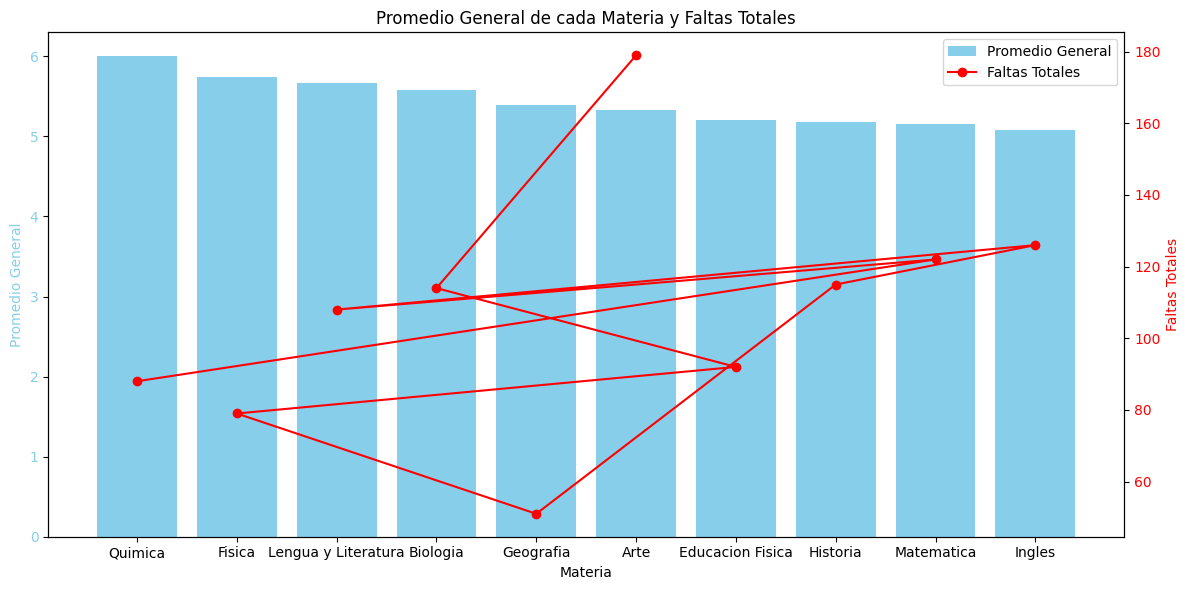

In [4]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import pandas as pd
import matplotlib.pyplot as plt

# Calculate the average grade for each subject
average_grades = df.groupby('Materia').agg({'Nota 1er Trimestre': 'mean', 'Nota 2do Trimestre': 'mean', 'Nota 3er Trimestre': 'mean'})
average_grades['Promedio General'] = average_grades.mean(axis=1)

# Sort subjects by average grade in descending order
average_grades = average_grades.sort_values('Promedio General', ascending=False)

# Calculate the total absences for each subject
total_absences = df.groupby('Materia')['Faltas'].sum()

# Create the bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot average grades
ax1.bar(average_grades.index, average_grades['Promedio General'], color='skyblue', label='Promedio General')
ax1.set_xlabel('Materia')
ax1.set_ylabel('Promedio General', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Promedio General de cada Materia y Faltas Totales')

# Create a second y-axis for absences
ax2 = ax1.twinx()
ax2.plot(total_absences.index, total_absences.values, color='red', marker='o', label='Faltas Totales')
ax2.set_ylabel('Faltas Totales', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')


plt.show()